In [1]:
from os import system
import pickle

## PFLOTRAN
import jupypft.model as mo
import jupypft.parameter as pm
import jupypft.plotBTC as plotBTC

def resetPickle():
    mo.Model.resetListOfModels()
    global caseDict
    with open('caseDict.pkl', 'rb') as f:
        caseDict = pickle.load(f)
    
    pm.Parameter.rebuildListOfObjects(caseDict)
    
    global listOfAllParameters
    listOfAllParameters = pm.Parameter.list_of_vars()
    
    system("rm -rf CASE*")
    
def plotResults():
    system("rm -rf MASSBALANCES; mkdir MASSBALANCES")
    system("cp ./CASE**/*-mas.dat ./MASSBALANCES")
    mo.Model.folderFixedToCSV("MASSBALANCES")

    waterDensity = 999.65
    m3ToL = 1000.

    plotBTC.plotMassBalancesInFolder(
        folderToPlot="MASSBALANCES",
        indices = {'t':"Time [d]",\
                   'q':"ExtractWell Water Mass [kg/d]",\
                   'm':"ExtractWell Vaq [mol/d]"},
        normalizeWith={'t':1.0,'q':waterDensity/m3ToL,'m':1.0},
        legendTitle = legendTitle)
    
def buildSim(caseName):
    ## Create a folder for the case
    currentFolder = "./CASE_{0}".format(caseName)
    currentFile = currentFolder + "/" + caseName +".in"
    system("mkdir " + currentFolder)
    
    ## Initialize PFLOTRAN model
    BoxModel = mo.Model(
        templateFile = templateFile,
        runFile = currentFile,
        execPath = execPath,
        verbose=True
        )
       
    ## Copy template input file to folder
    BoxModel.cloneTemplate()
    
    ## Replace tags for values in case
    for parameter in listOfAllParameters:
        BoxModel.replaceTagInFile(parameter)

    return BoxModel

## Dummy for caseDict
caseDict = {}

In [2]:
def getTemplate(key):
    templateFiles = {"TH_RSandbox_Model":"tpl_TH_3Dbox_bioparticleTModel_2closedBounds.in",\
                 "TH_RSandbox_Const":"tpl_TH_3Dbox_bioparticleKte_2closedBounds.in",\
                 "TH_RDecay":"tpl_TH_3Dbox_radioactiveDecay_2closedBounds.in",\
                 "Richards_RDecay":"tpl_TH_3Dbox_radioactiveDecay_2closedBounds.in",\
                 "Richards":"tpl_Richards_3Dbox_conservative_2closedBounds.in",\
                 "TH_RSandbox_Model_lineSource":"tpl_TH_3Dbox_bioparticleTModel_open_lineSource.in"}

    templateFolder = "../TEMPLATES/boxes_3D/"
    return templateFolder + templateFiles[key]
    
templateFile = getTemplate('TH_RSandbox_Const')
execPath = "$PFLOTRAN_DIR/buildExperimental/pflotran"

NumExpr defaulting to 8 threads.


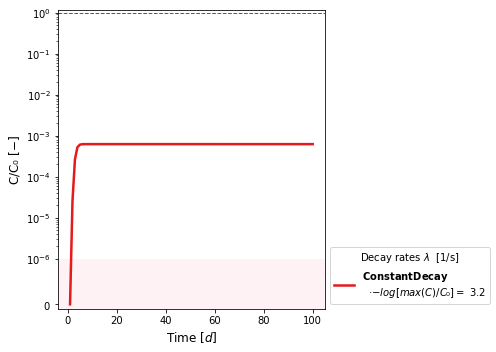

In [3]:
resetPickle()
caseDict['Gradient']['X'].value = 1.0E-3

## Build escenarios

### Using bioparticle sandbox - TH
templateFile = getTemplate('TH_RSandbox_Const')
caseDict['BIOPARTICLE']['decayAq'].value = 3.5353E-06
buildSim("ConstantDecay")

## Run and plot
mo.Model.runAllModels(nProcs=6)
legendTitle = "Decay rates $\lambda$  [1/s]"
plotResults()

In [5]:
caseDict

{'Temp': {'Reference': <initialTemp> = 1.000E+01,
  'Atmosphere': <atmosphereTemp> = 1.000E+01,
  'Injection': <leakageTemp> = 1.000E+01},
 'longDisp': <longDisp> = 0.000E+00,
 'Gradient': {'X': <GradientX> = 1.000E-03,
  'Y': <GradientY> = 0.000E+00,
  'Z': <Gradient>> = 0.000E+00},
 'L': {'X': <LenX> = 2.000E+02,
  'Y': <LenY> = 1.000E+02,
  'Z': <LenZ> = 2.000E+01},
 'k': {'X': <PermX> = 1.000E-08,
  'Y': <PermY> = 1.000E-08,
  'Z': <PermZ> = 1.000E-08},
 'theta': <porosity> = 3.500E-01,
 'outCoord': {'X': {1: <outX1> = 1.000E+02, 2: <outX2> = 1.000E+02},
  'Y': {1: <outY1> = 5.000E+01, 2: <outY2> = 5.000E+01},
  'Z': {1: <outZ1> = 1.000E+01, 2: <outZ2> = 1.900E+01}},
 'inCoord': {'X': {1: <inX1> = 1.400E+02, 2: <inX2> = 1.400E+02},
  'Y': {1: <inY1> = 5.000E+01, 2: <inY2> = 5.000E+01},
  'Z': {1: <inZ1> = 1.500E+01, 2: <inZ2> = 1.900E+01}},
 'C0': <initialConcentration> = 1.000E+00,
 'Q': {'In': <inRate> = 2.400E-01, 'Out': <outRate> = -2.100E+01},
 'nGrid': {'X': <nX> = 41, 'Y': <